# 00 Machine Learning: Linear Regression 

**Sklearn modeling flow**
- Import the model: `from sklearn import model`
- Instantiate the model: `model = model()`
- Train the model: `model.fit(X, y)`
- Evaluate the model: `model.score(new_X, new_y)`
- Predict outcomes with new data: `model.predict(new_X)`

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression

### 01 Reading the <font color="green">Data</color>

In [4]:
# Read in housing data
data = pd.read_csv('data/csv/data_ml_houses.csv')
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Pesos', 'WallMat', 'RoofSurface',
       'ChimneyStyle', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'G

In [7]:
filtered = data[['GrLivArea','SalePrice']]
filtered.head(3)

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

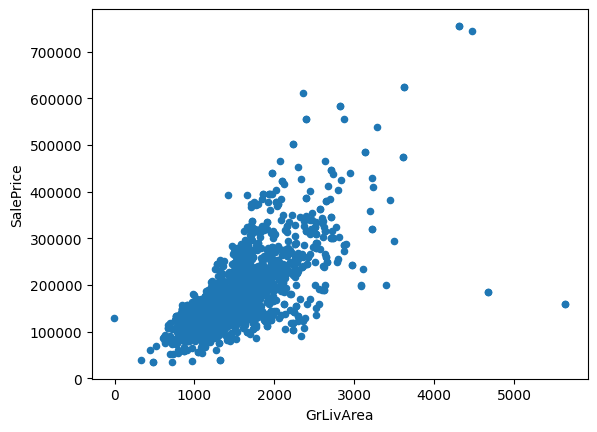

In [17]:
# visualise to check correlation
filtered.plot(x='GrLivArea',y='SalePrice',kind='scatter')

### 02 <font color="green">Training</font> the model

In [18]:
# Instantiate the model
model = LinearRegression()

# Define X and Y
x = data[['GrLivArea']]
y = data['SalePrice']

# Train the model on the data
model.fit(x,y)


LinearRegression()

In [19]:
# models slope
model.coef_

array([105.00927564])

In [21]:
# model intercept
model.intercept_

22104.12101002081

In [22]:
# Evaluate the models performance
model.score(x,y)

0.48960426399689116

### 03 Making New <font color="green">Predictions</font>

In [24]:
# create new data input 
new_data = pd.DataFrame({'GrLivArea': [1000]})
new_data

,GrLivArea
0,1000


In [42]:
# Use model to predict cost of building with area of 1000 ft2
result = model.predict(new_data)
result

array([127113.39664561])

In [43]:
result = int(list(model.predict(new_data))[0])
print(f'the value of the **new data** is ${result}')

the value of the **new data** is $127113


### 04 <font color="green">Visualising</font> the prediciton

with matplotlib....

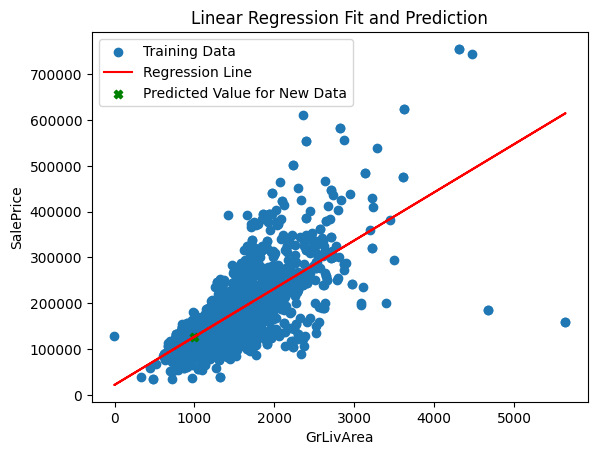

In [46]:
# Plot the training data and regression line
plt.scatter(x, y, label='Training Data')
plt.plot(x, model.predict(x), color='red', label='Regression Line')

# Plot the predicted point for new data
new_data = pd.DataFrame({'GrLivArea': [1000]})
predicted_value = result
plt.scatter(new_data, predicted_value, color='green', marker='X', label='Predicted Value for New Data')

# Add labels and title
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression Fit and Prediction')

# Add a legend
plt.legend()

with plotly....

In [64]:
# Plot the training data and regression line
fig = px.scatter(x=x['GrLivArea'], y=y, title='Linear Regression Fit and Prediction', labels={'x': 'GrLivArea', 'y': 'SalePrice'},opacity=0.2)
fig.add_scatter(x=x['GrLivArea'], y=model.predict(x), mode='lines', name='Regression Line')

# Plot the predicted value for new data with larger and transparent markers
new_data = pd.DataFrame({'GrLivArea': [1000]})
predicted_value = model.predict(new_data)
fig.add_scatter(x=new_data['GrLivArea'], y=predicted_value, mode='markers', marker=dict(color='green', symbol='x', size=10), name='Predicted Value for New Data')
